# Data Loading

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! kaggle datasets download kumarvishal88/ml-assignment-2-dataset

  0% 0.00/567k [00:00<?, ?B/s]
100% 567k/567k [00:00<00:00, 96.1MB/s]


In [ ]:
! unzip ml-assignment-2-dataset

Archive:  ml-assignment-2-dataset.zip
  inflating: Airplane.csv            
  inflating: Salary.csv              


In [ ]:
import csv

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_samples, silhouette_score

#Supervised Question


1. ⟨ 3 Marks ⟩ Use Least Square method to find 3 best fit lines using ”Education” as independent and ”Salary”
as dependent variable, ”Occupation” as independent and ”Salary” as dependent variable and ”Experience” as
independent and ”Salary” as dependent variable. Plot the best fit lines for all three case.

2. ⟨ 2 Marks ⟩ Check goodness of fit by R-square method for all three fits. Comment your observation.

{'Doctoral': 1, 'Primary': 2, 'Upper secondary': 3, 'Master': 4, 'Bachelor': 5, 'Lower secondary': 6}


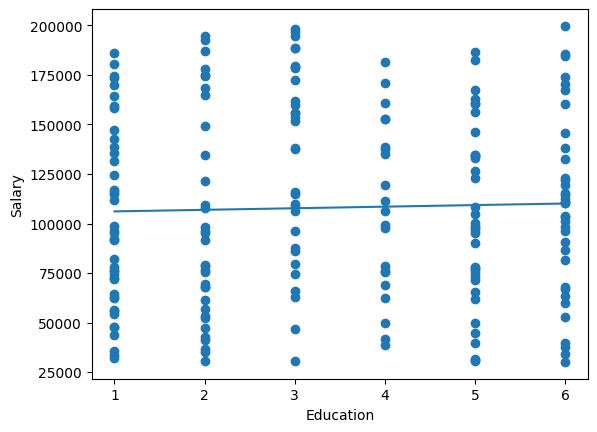

0.0009263437348053793


In [ ]:
# Using "Education" as independent and "Salary" as dependent variable
education = {}
with open("/content/Salary.csv", 'r') as file:
  csvreader = csv.reader(file)
  for row in csvreader:
    # print(row)
    if row[2] not in education.keys():
      education[row[2]] = 0
    education[row[2]] += 1

myKeys = list(education.keys())
myKeys.sort()
sorted_dict = {i: education[i] for i in myKeys}

del education["Education"]
cnt = 1
for edu in education.keys():
  education[edu] = cnt
  cnt += 1

print(education)

points = []
with open("/content/Salary.csv", 'r') as file:
  csvreader = csv.reader(file)
  chk = False
  for row in csvreader:
    if chk == False:
      chk = True
      continue
    points.append((education[row[2]], (int) (row[5])))

x_avg, y_avg = 0, 0
for x, y in points:
  x_avg += x
  y_avg += y

x_avg /= len(points)
y_avg /= len(points)

num, den = 0, 0
for x, y in points:
  num += (x_avg - x) * (y_avg - y)
  den += (x_avg - x) ** 2

m = num / den
c = y_avg - m * x_avg

xt = np.array([1, 2, 3, 4, 5, 6])
yt = m * xt + c
plt.plot(xt, yt)
plt.scatter(*zip(*points))
plt.xlabel("Education")
plt.ylabel("Salary")
# plt.scatter(*zip(*line))

plt.show()

rnum = 0
rden = 0
for x, y in points:
  rnum += (y - (m * x + c)) ** 2
  rden += (y -y_avg) ** 2

print(1 - rnum / rden)

{'Baker': 1, 'Economist': 2, 'Electrician': 3, 'Producer': 4, 'Agronomist': 5, 'Salesman': 6, 'Police Officer': 7, 'Fine Artist': 8, 'Medic': 9, 'Interior Designer': 10, 'Dancer': 11, 'Insurer': 12, 'Lawer': 13, 'Carpenter': 14, 'Engineer': 15, 'Auditor': 16, 'Photographer': 17, 'Programmer': 18, 'Chemist': 19, 'Meteorologist': 20, 'Veterinarian': 21, 'Graphic Designer': 22, 'Lecturer': 23, 'Botanist': 24, 'Historian': 25, 'Aeroplane Pilot': 26, 'Interpreter': 27, 'Firefighter': 28, 'Chef': 29, 'Hairdresser': 30, 'Astronomer': 31, 'Physicist': 32, 'Jeweller': 33, 'Mathematician': 34, 'Driver': 35, 'Composer': 36, 'Teacher': 37, 'Cook': 38, 'Florist': 39, 'Journalist': 40, 'Scientist': 41, 'Fashion Designer': 42, 'Pharmacist': 43, 'Architect': 44, 'Manager': 45, 'Accountant': 46, 'Geologist': 47, 'Singer': 48, 'Mechanic': 49, 'Social Worker': 50, 'Biochemist': 51}


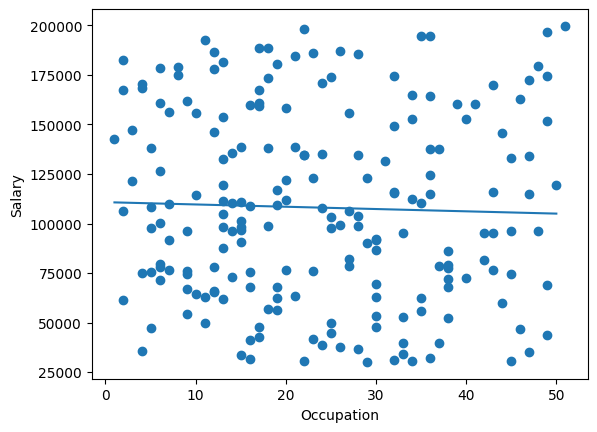

0.0010700920718176299


In [ ]:
# Using ”Occupation” as independent and ”Salary” as dependent variable
occupation = {}
with open("/content/Salary.csv", 'r') as file:
  csvreader = csv.reader(file)
  for row in csvreader:
    if row[3] not in occupation.keys():
      occupation[row[3]] = 0
    occupation[row[3]] += 1

myKeys = list(occupation.keys())
myKeys.sort()
sorted_dict = {i: occupation[i] for i in myKeys}

del occupation["Occupation"]
cnt = 1
for ocu in occupation.keys():
  occupation[ocu] = cnt
  cnt += 1

print(occupation)

points = []
with open("/content/Salary.csv", 'r') as file:
  csvreader = csv.reader(file)
  chk = False
  for row in csvreader:
    if chk == False:
      chk = True
      continue
    points.append((occupation[row[3]], (int) (row[5])))

# points = standardised_Matrix(points)
x_avg, y_avg = 0, 0
for x, y in points:
  x_avg += x
  y_avg += y

x_avg /= len(points)
y_avg /= len(points)

num, den = 0, 0
for x, y in points:
  num += (x_avg - x) * (y_avg - y)
  den += (x_avg - x) ** 2

m = num / den
c = y_avg - m * x_avg

xt = np.array(list(range(1, len(occupation))))
yt = m * xt + c
plt.plot(xt, yt)
plt.scatter(*zip(*points))
plt.xlabel("Occupation")
plt.ylabel("Salary")
plt.show()

rnum = 0
rden = 0
for x, y in points:
  rnum += (y - (m * x + c)) ** 2
  rden += (y -y_avg) ** 2

print(1 - rnum / rden)

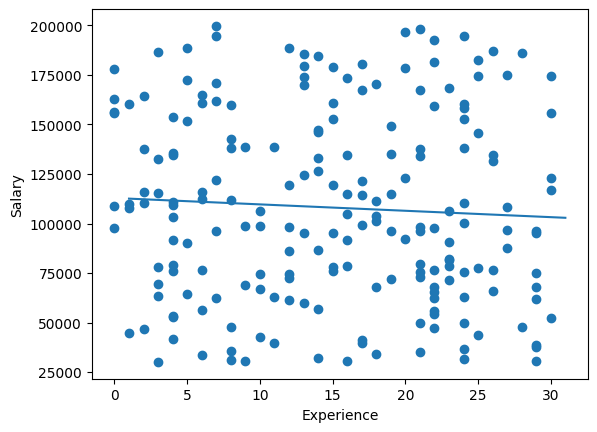

0.00346314739488518


In [ ]:
# Using  ”Experience” as independent and ”Salary” as dependent variable

points = []
with open("/content/Salary.csv", 'r') as file:
  csvreader = csv.reader(file)
  chk = False
  for row in csvreader:
    if chk == False:
      chk = True
      continue
    points.append(((int) (row[4]), (int) (row[5])))

x_avg, y_avg = 0, 0
for x, y in points:
  x_avg += x
  y_avg += y

x_avg /= len(points)
y_avg /= len(points)

num, den = 0, 0
for x, y in points:
  num += (x_avg - x) * (y_avg - y)
  den += (x_avg - x) ** 2

m = num / den
c = y_avg - m * x_avg

xt = np.array(list(range(1, 32)))
yt = m * xt + c
plt.plot(xt, yt)
plt.scatter(*zip(*points))
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

rnum = 0
rden = 0
for x, y in points:
  rnum += (y - (m * x + c)) ** 2
  rden += (y -y_avg) ** 2

print(1 - rnum / rden)

3. ⟨ 2 Marks ⟩ Use above mentioned dependent and independent variables to perform a multiple linear regression
and compare its performance with polynomial regression. Comment your observation


In [ ]:
def pred_val(theta, x):
  y = np.matmul(theta, np.transpose(x))
  return y

In [ ]:
def get_theta(x, y):
  x_trans = np.transpose(x)                   # x_trans -> transpose of matrix x
  x_pi = np.linalg.inv(np.matmul(x_trans, x))    # x_pi -> pseudo inverse of matrix x
  x_f = np.matmul(x_pi, x_trans)

  return np.matmul(x_f, y)

In [ ]:
x = []
y = []
with open("/content/Salary.csv", 'r') as file:
  csvreader = csv.reader(file)
  chk = False
  for row in csvreader:
    if chk == False:
      chk = True
      continue
    x.append((1, education[row[2]], occupation[row[3]], (int) (row[4])))
    y.append((int) (row[5]))

theta = get_theta(x, y)

y_pred = []
lis = []

for i in range(len(x)):
  val = pred_val(theta, x[i])
  y_pred.append(val)
  lis.append((y[i], val))

y_avg = sum(y) / len(y)

rnum = 0
rden = 0
for yi, yi1 in lis:
  rnum += (yi - yi1) ** 2
  rden += (yi - y_avg) ** 2
print(" performance with a multiple linear regression = ", 1 - rnum / rden)

 performance with a multiple linear regression =  0.005855813055618553


In [ ]:
x = []
y = []
with open("/content/Salary.csv", 'r') as file:
  csvreader = csv.reader(file)
  chk = False
  for row in csvreader:
    if chk == False:
      chk = True
      continue
    x1, x2, x3 = education[row[2]], occupation[row[3]], (int) (row[4])
    x.append((1, x1, x1 ** 2, x2, x2 ** 2, x3, x3 ** 2))
    y.append((int) (row[5]))

theta = get_theta(x, y)

y_pred = []
lis = []

for i in range(len(x)):
  val = pred_val(theta, x[i])
  y_pred.append(val)
  lis.append((y[i], val))

y_avg = sum(y) / len(y)

rnum = 0
rden = 0
for yi, yi1 in lis:
  rnum += (yi - yi1) ** 2
  rden += (yi - y_avg) ** 2
print(" performance with polynomial regression = ", 1 - rnum / rden)

 performance with polynomial regression =  0.03035922308840322


4. ⟨ 3 Marks ⟩ Identify all relevant data for salary prediction and perform principal component analysis (PCA)
on the data, and again perform linear regression on new transformed data and compare results with above two
methods. Comment your observation.

In [ ]:
data = pd.read_csv('/content/Salary.csv')

data_encoded = pd.get_dummies(data, columns=['Education', 'Occupation'])

numerical_cols = ['Experience (Years)']
scaler = StandardScaler()
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

X = data_encoded.drop(['First Name', 'Last Name', 'Salary'], axis=1)
n_components = 2
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(X)
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['Salary'] = data['Salary']

In [ ]:
x = []
y = []
for index, row in data.iterrows():
    education_value = education[row['Education']]
    occupation_value = occupation[row['Occupation']]
    x.append((1, education_value, occupation_value, int(row['Experience (Years)'])))
    y.append(int(row['Salary']))

theta = get_theta(x, y)

y_pred = []
lis = []

for i in range(len(x)):
  val = pred_val(theta, x[i])
  y_pred.append(val)
  lis.append((y[i], val))

y_avg = sum(y) / len(y)

rnum = 0
rden = 0
for yi, yi1 in lis:
  rnum += (yi - yi1) ** 2
  rden += (yi - y_avg) ** 2
print("After peroforming PCA, performance with a multiple linear regression = ", 1 - rnum / rden)

x = []
y = []

for index, row in data.iterrows():
    x1 = education[row['Education']]
    x2 = occupation[row['Occupation']]
    x3 = int(row['Experience (Years)'])
    x.append((1, x1, x1 ** 2, x2, x2 ** 2, x3, x3 ** 2))
    y.append((int) (row[5]))

theta = get_theta(x, y)

y_pred = []
lis = []

for i in range(len(x)):
  val = pred_val(theta, x[i])
  y_pred.append(val)
  lis.append((y[i], val))

y_avg = sum(y) / len(y)

rnum = 0
rden = 0
for yi, yi1 in lis:
  rnum += (yi - yi1) ** 2
  rden += (yi - y_avg) ** 2
print("After perform PCA, performance with polynomial regression = ", 1 - rnum / rden)

After peroforming PCA, performance with a multiple linear regression =  0.005855813055618553
After perform PCA, performance with polynomial regression =  0.03035922308840322


5. ⟨ 3 Marks ⟩ Check for orthogonality in the relevant data matrix if not make them orthogonal and then perform
multiple regression and compare the results with above results and comment your observation.

In [ ]:
data = pd.read_csv('Salary.csv')

for index, row in data.iterrows():
    x1 = education[row['Education']]
    x2 = occupation[row['Occupation']]
    x3 = int(row['Experience (Years)'])
    row['Education'] = x1
    row['Occupation'] = x2
    row['Experience (Years)'] = x3
X = data[['Education', 'Occupation', 'Experience (Years)']]



6. ⟨ 2 Marks ⟩ Plot original ”Experience” and orthogonalized ”Experience” variable as scatter plot and comment
on changes in the variable data after orthogonalization.

# Unsupervised Learning

1. ⟨ 4 Marks ⟩ Do basic data pre-processing on the data and perform PCA (scratch implementation) and tell
what percentage of variance is covered by first principal component, first and second principal component.

Basic data pre-processing

In [ ]:
import pandas as pd
df = pd.read_csv('Airplane.csv')

cat = ['Operator', 'Route', 'cn/In', 'Type', 'Flight #', 'Registration', 'Location']
for x in cat:
  labels = df[x].astype('category')
  df[x] = labels.cat.codes

df.to_csv('categorized_data.csv', index=False)

In [ ]:
ddf = pd.read_csv('categorized_data.csv')
ddf = ddf.drop(columns = ['Date', 'Time', 'Summary'])
ddf = ddf.dropna()


In [ ]:
value_list = []
for column in ddf.columns:
    values = ddf[column].tolist()
    value_list.extend(values)

work_arr = []
cnt = 0
temp = []
for x in value_list:
    temp.append(float(x))
    if len(temp) == 10:
        cnt = 0
        work_arr.append(temp)
        temp = []

work_arr = np.array(work_arr)

perform PCA (scratch implementation)

In [ ]:
mean = np.mean(work_arr, axis=0)
data = work_arr - mean
cov = np.cov(data.T)
def pca(data,k):
    global pca_test,eig_val
    eig_val, eig_vec = np.linalg.eig(cov)
    eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
    eig_pairs = eig_pairs[:k]
    eig_vec = np.array([eig_pairs[i][1] for i in range(k)])
    data = np.dot(data, eig_vec.T)
    return data

pca1 = pca(data,1)
pca12 = pca(data, 2)

what percentage of variance is covered by first principal component, first and second principal component.

2. ⟨ 4 Marks ⟩ Implement K-means (scratch implementation) clustering for the column ”Type” in data with
(K=Number of classes) and plot the results.

In [ ]:
def silhoutte_samples(data, labels):
    for i in range(data.shape[0]):
        squared_dists_to_i = np.sum(np.square(data - data[i]), axis=1)
        a_i = np.mean(squared_dists_to_i[labels == labels[i]])
        b_i = np.min([np.mean(squared_dists_to_i[labels == j]) for j in np.unique(labels) if j != labels[i]])
        s = (b_i - a_i) / np.maximum(a_i, b_i)
    return s

In [ ]:
def loss_func1(k, arr, c, centroids):
  val = 0
  for i in range(len(arr)):
    val += (arr[i] - centroids[c[i]]) ** 2
  return val

In [ ]:
def my_KMeans(k, arr):
  w = [i for i in range(k)]
  c = [-1] * len(arr)

  loss_val = 1e18
  while loss_val > loss_func1(k, arr, c, w):
    loss_val = loss_func1(k, arr, c, w)
    for i in range(len(arr)):
      temp = 1e18
      for j in range(len(w)):
        if (arr[i] - w[j]) ** 2 <= temp:
          temp = (arr[i] - w[j]) ** 2
          c[i] = j

    for j in range(len(w)):
      sm1, sm2 = 0, 0
      for i in range(len(arr)):
        if c[i] == j:
          sm1 += arr[i]
          sm2 += 1
      if sm2 != 0:
        w[j] = sm1 / sm2
  return w, c

Enter the value of k : 5
w1 :  [219.12544802867384, 740.0574850299402, 1185.6159147869673, 1714.2209414024976, 2229.259978425027]
clust_list :  [2335, 1061, 1023, 2349, 2351, 2362, 2350, 2068, 2355, 2354, 2185, 2356, 82, 2069, 2352, 2357, 2353, 2358, 2360, 2361, 2359, 1045, 1045, 1045, 1045, 1021, 1052, 1045, 1045, 1021, 1020, 1045, 1045, 165, 1045, 1594, 1589, 1045, 2059, 656, 1045, 1045, 1481, 656, 1045, 1589, 656, 1045, -1, 1045, 1045, -1, 1045, 656, 2044, 2028, 667, 1493, 1062, 2410, -1, 2287, 1045, 374, 656, 1045, 2420, 656, 656, 1681, 656, 1045, 1045, 1366, 377, 1045, 2411, 1589, 1045, 2348, 1045, 1045, 1408, 1589, 1045, -1, 1045, 2412, 1589, 656, 656, 1373, 1681, 656, 2028, 1063, -1, 1366, 1017, 1589, 656, 777, 1397, 1589, 373, 2117, 1412, 1494, 656, 2046, 1400, 656, 2421, -1, 1273, 1412, 2051, 1589, 1403, 1414, 1400, 226, 1075, 656, 1342, 1360, 1589, 1273, 656, 656, 1637, 1342, 1628, 656, 656, 656, 396, -1, 1366, 396, 2042, 1630, 1416, 1589, 1, 1273, 1589, 2268, 1374, 1417, 375

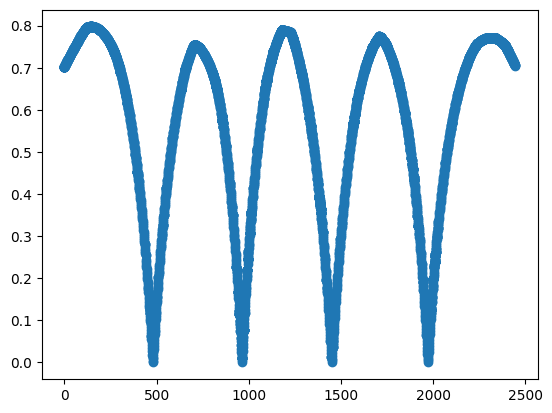

In [ ]:
clust_list = [i for i in ddf.Type]
k = int(input("Enter the value of k : "))
w1, c1 = my_KMeans(k, clust_list)
print("w1 : ", w1)
print("clust_list : ", clust_list)
clust_list = np.array(clust_list).reshape(-1, 1)
silhouette_scores = silhouette_samples(clust_list, c1)
silhouette_avg = silhouette_score(clust_list, c1)

print("silhouette_scores : ", silhouette_scores)
print("silhouette_avg = ", silhouette_avg)

plt.scatter(clust_list, silhouette_scores)
plt.show()

3. ⟨ 2 Marks ⟩ Perform above implemented K-means clustering on columns ”Location”, ”Operator” in data and
report the results, discuss on your findings.

In [ ]:
def loss_func2D(k, arr, c, w):
  val = 0
  for i in range(len(arr)):
    val += (arr[i][0] - w[c[i]][0]) ** 2 + (arr[i][1] - w[c[i]][1]) ** 2
  return val

In [ ]:
def my_KMeans2Dp(k, arr):
  w = [(i, i) for i in range(k)]
  c = [-1] * len(arr)

  loss_val = 1e64
  while loss_val > loss_func2D(k, arr, c, w):
    loss_val = loss_func2D(k, arr, c, w)
    for i in range(len(arr)):
      temp = 1e64
      for j in range(len(w)):
        if (arr[i][0] - w[j][0]) ** 2 + (arr[i][1] - w[j][1]) ** 2 <= temp:
          temp = (arr[i][0] - w[j][0]) ** 2 + (arr[i][1] - w[j][1]) ** 2
          c[i] = j

    for j in range(len(w)):
      sm1x, sm2x = 0, 0
      sm1y, sm2y = 0, 0
      for i in range(len(arr)):
        if c[i] == j:
          sm1x += arr[i][0]
          sm1y += 1
          sm2x += arr[i][1]
          sm2y += 1
      if sm1y != 0 and sm2y != 0:
        w[j] = (sm1x / sm1y, sm2x / sm2y)
  return w, c

Enter the value of k : 5


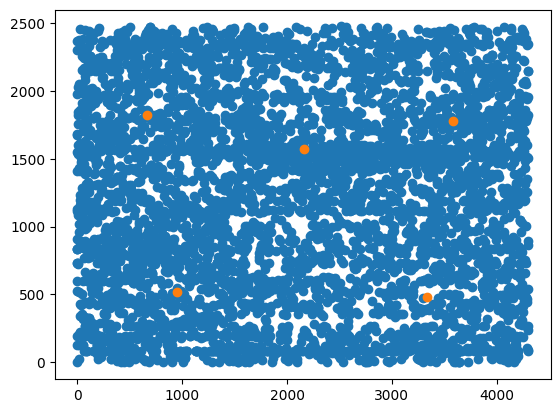

In [ ]:
clLoc = [i for i in ddf.Location]
clOpe = [i for i in ddf.Operator]
nl = []
for i in range(len(clLoc)):
  nl.append([clLoc[i], clOpe[i]])

k = int(input("Enter the value of k : "))
w1, c1 = my_KMeans2Dp(k, nl)
silhouette_scores = silhouette_samples(nl, c1)
silhouette_avg = silhouette_score(nl, c1)

l1, l2 = [], []
for i in w1:
  l1.append(i[0])
  l2.append(i[1])
plt.scatter(clLoc, clOpe)
plt.scatter(l1, l2)
plt.show()

4. ⟨ 3 Marks ⟩ Using column ”Route” from dataset and above implemented clustering algorithm tell which route
is the most dangerous (here route with most crashes), plot and write your observation.


Enter the value of k : 5


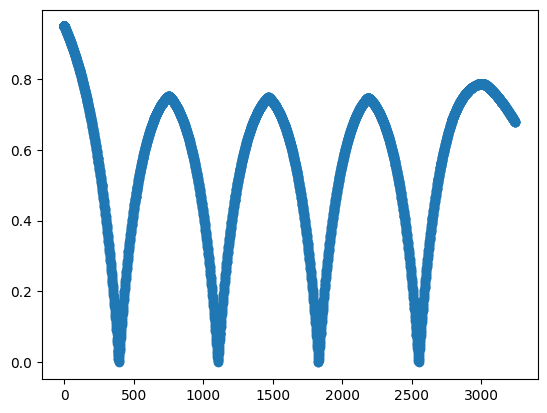

The most dangerous route is the data point which has the route value =  [2548]


In [ ]:
clust_list = [i for i in ddf.Route]
k = int(input("Enter the value of k : "))
w1, c1 = my_KMeans(k, clust_list)
clust_list = np.array(clust_list).reshape(-1, 1)
silhouette_scores = silhouette_samples(clust_list, c1)
silhouette_avg = silhouette_score(clust_list, c1)

max_val = 1.1
dangerous = -1
for i in range(len(silhouette_scores)):
  if silhouette_scores[i] < max_val:
    max_val = silhouette_scores[i]
    dangerous = clust_list[i]

plt.scatter(clust_list, silhouette_scores)
plt.show()

print("The most dangerous route is the data point which has the route value = ", dangerous)

5. ⟨ 2 Marks ⟩ By using silhouette score report correctness of all above clusterings and write your observations.

Silhouette Coefficient:
Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

  1: Means clusters are well apart from each other and clearly distinguished.

  0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

  -1: Means clusters are assigned in the wrong way.


    Silhouette Score = (b-a)/max(a,b)

where

a= average intra-cluster distance i.e the average distance between each point within a cluster.

b= average inter-cluster distance i.e the average distance between all clusters.


